In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df_pop = pd.read_csv('df_pop.csv')
df_anim = pd.read_csv('df_anim.csv')
df_veg = pd.read_csv('df_veg.csv')

FBS : Bilans Alimentaires: Bilans Alimentaires (2010-)

In [132]:
# 1.Nettoyer les titres de colonnes en supprimant les espaces au début et à la fin, en remplaçant les espaces par des underscores et en mettant tout en minuscule
df_pop.columns = df_pop.columns.str.strip().str.lower().str.replace(' ', '_')
df_anim.columns = df_anim.columns.str.strip().str.lower().str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.strip().str.lower().str.replace(' ', '_')

In [133]:
#2.Quelle sont les dimensions des jeux de données ?
print("La dimension de df_pop est : ",df_pop.shape)
print("La dimension de df_anim est : ",df_anim.shape)
print("La dimension de df_veg est : ",df_veg.shape)

La dimension de df_pop est :  (366, 14)
La dimension de df_anim est :  (31542, 14)
La dimension de df_veg est :  (93458, 14)


In [134]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [135]:
# 3.A quoi ressemblent les 5 premières lignes de mes jeux de données ?
print("les 5 premières lignes de df_pop est : ",df_pop.head(5))
print("les 5 premières lignes de df_anim est : ",df_anim.head(5))
print("les 5 premières lignes de df_veg est : ",df_veg.head(5))

les 5 premières lignes de df_pop est :    domain_code                 domain  area_code_(fao)         area  \
0         FBS  Food Balances (2010-)                2  Afghanistan   
1         FBS  Food Balances (2010-)                2  Afghanistan   
2         FBS  Food Balances (2010-)                3      Albania   
3         FBS  Food Balances (2010-)                3      Albania   
4         FBS  Food Balances (2010-)                4      Algeria   

   element_code                        element item_code_(cpc)        item  \
0           511  Total Population - Both sexes           S2501  Population   
1           511  Total Population - Both sexes           S2501  Population   
2           511  Total Population - Both sexes           S2501  Population   
3           511  Total Population - Both sexes           S2501  Population   
4           511  Total Population - Both sexes           S2501  Population   

   year_code  year          unit     value flag  \
0       2018  2018 

In [136]:
#4.Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. 
df_anim = df_anim.assign(type='animal')
df_veg = df_veg.assign(type='vegetal')

In [137]:
df_anim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31542 entries, 0 to 31541
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   domain_code       31542 non-null  object 
 1   domain            31542 non-null  object 
 2   area_code_(fao)   31542 non-null  int64  
 3   area              31542 non-null  object 
 4   element_code      31542 non-null  int64  
 5   element           31542 non-null  object 
 6   item_code_(cpc)   31542 non-null  object 
 7   item              31542 non-null  object 
 8   year_code         31542 non-null  int64  
 9   year              31542 non-null  int64  
 10  unit              31542 non-null  object 
 11  value             31542 non-null  float64
 12  flag              31542 non-null  object 
 13  flag_description  31542 non-null  object 
 14  type              31542 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.6+ MB


In [138]:
# Regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.
product = pd.concat([df_veg,df_anim], ignore_index=True)

In [139]:
df_anim.shape

(31542, 15)

In [140]:
df_veg.shape

(93458, 15)

In [141]:
product.shape

(125000, 15)

In [142]:
df_pop.head(1)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.0,X,Figure from international organizations


In [143]:
#5.Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. 
df_pop = df_pop[["area_code_(fao)","area","year","value"]]
# Renommer la colonne ‘value’ en ‘pop_1000_hab’.
df_pop = df_pop.rename(columns={'value':'pop_1000_hab'})
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00
...,...,...,...,...
361,249,Yemen,2019,29161.92
362,251,Zambia,2018,17352.00
363,251,Zambia,2019,17861.03
364,181,Zimbabwe,2018,14438.80


In [144]:
product.head(1)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal


In [145]:
#6.Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.
product = product[["area_code_(fao)","area","element","item","year","type","unit","value"]]
product

,area_code_(fao),area,element,item,year,type,unit,value
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,160.12
1,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,158.95
2,2,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/capita/day,1372.02
3,2,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/capita/day,1361.66
4,2,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/capita/day,37.00
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,Food supply (kcal/capita/day),Aquatic Plants,2019,animal,kcal/capita/day,0.00
124996,181,Zimbabwe,Protein supply quantity (g/capita/day),Aquatic Plants,2018,animal,g/capita/day,0.00
124997,181,Zimbabwe,Protein supply quantity (g/capita/day),Aquatic Plants,2019,animal,g/capita/day,0.00
124998,181,Zimbabwe,Fat supply quantity (g/capita/day),Aquatic Plants,2018,animal,g/capita/day,0.00


In [146]:
# 7.Fusionnez df_pop avec products et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. 
df = pd.merge(df_pop, product, on=['area_code_(fao)','area','year'])
# display(df)

# # Renommer les colonnes comme sur la capture d’écran ci-dessous.
df = df.drop('unit',axis=1)
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",animal,0.00
124996,181,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Aquatic Plants,animal,0.00
124997,181,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Aquatic Plants,animal,0.00
124998,181,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Aquatic Plants,animal,0.00


In [147]:
# 8.Quelles sont les types de données de chaque colonne ?
df.dtypes

area_code_(fao)      int64
area                object
year                 int64
pop_1000_hab       float64
element             object
item                object
type                object
value              float64
dtype: object

In [148]:
# 9.Combien y-a t’il de valeurs manquantes par variable ?
df.isnull().sum()

area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
value              0
dtype: int64

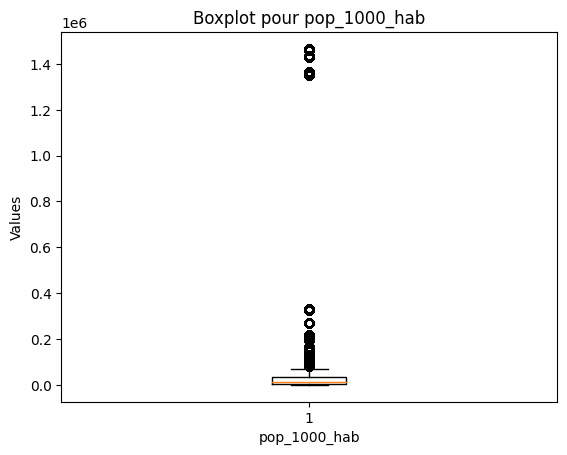

In [149]:
# 10.Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.
# Create a figure and axis object
fig, ax = plt.subplots()

# Draw the boxplot
plt.boxplot(df['pop_1000_hab'])

# Set the title and axis labels
ax.set_title('Boxplot pour pop_1000_hab')
ax.set_xlabel('pop_1000_hab')
ax.set_ylabel('Values')

# Display the plot
plt.show()


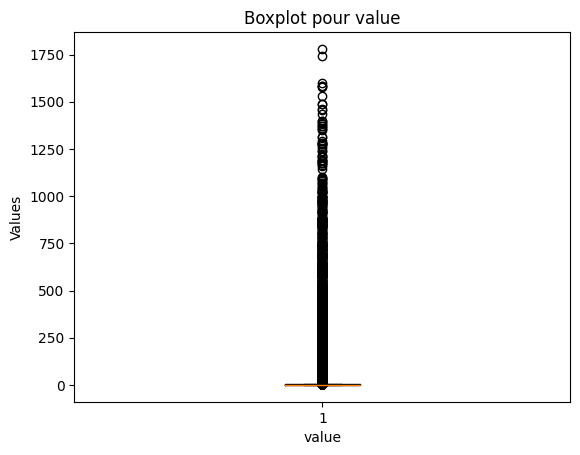

In [150]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Draw the boxplot
plt.boxplot(df['value'])

# Set the title and axis labels
ax.set_title('Boxplot pour value')
ax.set_xlabel('value')
ax.set_ylabel('Values')

# Display the plot
plt.show()

In [151]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,128.742184,2018.508584,5.143125e+04,11.001024
std,75.250822,0.499928,1.872539e+05,56.218072
min,1.000000,2018.000000,1.076000e+01,-0.030000
25%,66.000000,2018.000000,2.801000e+03,0.000000
50%,124.000000,2019.000000,9.965000e+03,0.190000
75%,191.000000,2019.000000,3.182529e+04,2.800000
max,351.000000,2019.000000,1.465634e+06,1779.760000


### - Si il y a une valeur negative -0.03 pour la colonne 'value'
### - Il existe aussi des valeurs aberrantes pour les colonnes 'pop_1000_hab' et 'value' en regardant leurs boxplots.

In [152]:
# df[['pop_1000_hab','value']] = df[['pop_1000_hab','value']].apply(lambda x: np.nan if 'L' in x else x)
#df = df.apply(lambda x: np.nan if 'L' in x else x)

In [153]:
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",animal,0.00
124996,181,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Aquatic Plants,animal,0.00
124997,181,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Aquatic Plants,animal,0.00
124998,181,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Aquatic Plants,animal,0.00


In [154]:
# 11.Affichez les valeurs uniques de la colonne area
df['area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

In [155]:
#12.Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.
df = pd.pivot_table(df, values='value', index=['area_code_(fao)','area','year','item','pop_1000_hab','type'], columns='element')
df

element                                                                    Fat supply quantity (g/capita/day)  \
area_code_(fao) area    year item                    pop_1000_hab type                                          
1               Armenia 2018 Apples and products     2951.74      vegetal                                0.12   
                             Aquatic Animals, Others 2951.74      animal                                 0.00   
                             Aquatic Plants          2951.74      animal                                 0.00   
                             Bananas                 2951.74      vegetal                                0.06   
                             Barley and products     2951.74      vegetal                                0.29   
...                                                                                                       ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                                0.29   
                             Vegetables, other       1465634.16   vegetal                                1.93   
                             Wheat and products      1465634.16   vegetal                                3.15   
                             Wine                    1465634.16   vegetal                                0.00   
                             Yams                    1465634.16   vegetal                                0.00   

element                                                                    Food supply (kcal/capita/day)  \
area_code_(fao) area    year item                    pop_1000_hab type                                     
1               Armenia 2018 Apples and products     2951.74      vegetal                          21.17   
                             Aquatic Animals, Others 2951.74      animal                            0.01   
                             Aquatic Plants          2951.74      animal                            0.00   
                             Bananas                 2951.74      vegetal                          12.51   
                             Barley and products     2951.74      vegetal                          54.14   
...                                                                                                  ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                          18.70   
                             Vegetables, other       1465634.16   vegetal                         213.68   
                             Wheat and products      1465634.16   vegetal                         580.98   
                             Wine                    1465634.16   vegetal                           3.48   
                             Yams                    1465634.16   vegetal                           0.01   

element                                                                    Food supply quantity (kg/capita/yr)  \
area_code_(fao) area    year item                    pop_1000_hab type                                           
1               Armenia 2018 Apples and products     2951.74      vegetal                                13.95   
                             Aquatic Animals, Others 2951.74      animal                                  0.00   
                             Aquatic Plants          2951.74      animal                                  0.00   
                             Bananas                 2951.74      vegetal                                 7.61   
                             Barley and products     2951.74      vegetal                                 6.00   
...                                                                                                        ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                                35.75   
                             Vegetables, other       1465634.16   vegetal                          

In [156]:
# reset the index
df = df.reset_index()
df


element,area_code_(fao),area,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,Tomatoes and products,1465634.16,vegetal,0.29,18.70,35.75,1.07
31424,351,China,2019,"Vegetables, other",1465634.16,vegetal,1.93,213.68,321.88,12.39
31425,351,China,2019,Wheat and products,1465634.16,vegetal,3.15,580.98,66.52,18.65
31426,351,China,2019,Wine,1465634.16,vegetal,0.00,3.48,1.86,0.00


In [157]:
#14.Faire du nettoyage dans le nom des colonnes
df.rename(columns={'area_code_(fao)': 'area_country', 'area': 'country'}, inplace=True)
df.drop(columns=('type'))

element,area_country,country,year,item,pop_1000_hab,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,Tomatoes and products,1465634.16,0.29,18.70,35.75,1.07
31424,351,China,2019,"Vegetables, other",1465634.16,1.93,213.68,321.88,12.39
31425,351,China,2019,Wheat and products,1465634.16,3.15,580.98,66.52,18.65
31426,351,China,2019,Wine,1465634.16,0.00,3.48,1.86,0.00
